# Data Preprocessing

In [1]:
# Important libraries
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import csv
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# File paths
fp_notebooks_folder = "./"
fp_code_folder = "../"
fp_processed_folder = os.path.join(fp_code_folder, "../processed_data")
fp_converted_folder = os.path.join(fp_processed_folder, "converted_to_csv")
fp_downsampled_folder = os.path.join(fp_processed_folder, "downsampled")
fp_downsampled_continuous_file = os.path.join(fp_downsampled_folder, "continous.csv")
fp_downsampled_dropna_file = os.path.join(fp_downsampled_folder, "dropna.csv")
fp_fields_file = os.path.join(fp_converted_folder, "fields.csv")

In [2]:
# Get fields file to analyse
fields_df = pd.read_csv(fp_fields_file, quoting=csv.QUOTE_NONE, escapechar='/', index_col=0)
fields_df

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n
4,0.976562,4606,5,1995-01-24,08:22:11,"['mmHg', 'mmHg', 'mmHg', 'bpm', '%']","['NBPmean', 'NBPsys', 'NBPdias', 'RESP', 'SpO2']",[],{'MULTIFORM VPBs': 4600},208n
...,...,...,...,...,...,...,...,...,...,...
111,0.976562,151176,14,1996-04-06,15:26:26,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'VPBs > 5/MIN': 20341, 'VPBs > 11/MIN': 1085,...",482n
112,0.976562,147656,15,1996-04-22,17:35:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'IRREGULAR HR': 19031, 'MULTIFORM VPBs': 1982...",484n
113,0.976562,154687,12,1996-04-29,14:48:52,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'PAIR VPBs': 731, 'VPBs > 11/MIN': 567, 'IRRE...",485n
114,0.976562,193946,18,1996-05-02,11:54:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'PAIR VPBs': 4158, 'RUN VPBs 3 - 9': 1688, 'M...",486n


In [3]:
def add_feat_names(fields_df):
    feat_names = []
    for i in range(len(fields_df)):
        row = fields_df.iloc[i]
        units_list, sig_list = eval(row["units"]), eval(row["sig_name"])
        cur_feat_names = {sig_list[j] + " (" + units_list[j] + ")" for j in range(len(units_list))}
        feat_names.append(cur_feat_names)
    return feat_names

fields_df["feat_cols"] = add_feat_names(fields_df)
fields_df

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{ABPdias (mmHg), PAPmean (mmHg), PULSE (bpm), ..."
4,0.976562,4606,5,1995-01-24,08:22:11,"['mmHg', 'mmHg', 'mmHg', 'bpm', '%']","['NBPmean', 'NBPsys', 'NBPdias', 'RESP', 'SpO2']",[],{'MULTIFORM VPBs': 4600},208n,"{NBPdias (mmHg), SpO2 (%), NBPsys (mmHg), RESP..."
...,...,...,...,...,...,...,...,...,...,...,...
111,0.976562,151176,14,1996-04-06,15:26:26,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'VPBs > 5/MIN': 20341, 'VPBs > 11/MIN': 1085,...",482n,"{ST2 (mV), ABPdias (mmHg), PAPmean (mmHg), ST1..."
112,0.976562,147656,15,1996-04-22,17:35:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'IRREGULAR HR': 19031, 'MULTIFORM VPBs': 1982...",484n,"{ETCO2 (mmHg), ABPdias (mmHg), PAPmean (mmHg),..."
113,0.976562,154687,12,1996-04-29,14:48:52,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'mmHg', 'bpm',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'CVP'...",[],"{'PAIR VPBs': 731, 'VPBs > 11/MIN': 567, 'IRRE...",485n,"{ABPdias (mmHg), PAPmean (mmHg), Tblood (degC)..."
114,0.976562,193946,18,1996-05-02,11:54:49,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'lpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'AWRR', 'C.O....",[],"{'PAIR VPBs': 4158, 'RUN VPBs 3 - 9': 1688, 'M...",486n,"{ST3 (mV), ST2 (mV), ETCO2 (mmHg), ABPdias (mm..."


## Select Feature Set

In [4]:
# Check what are the most common subset of features
def most_comment_subset_of_features(fields_df):
    feat_set_series = fields_df["feat_cols"]
    feat_set_counts = feat_set_series.value_counts().reset_index()
    feat_set_counts.columns = ["feat_set", "count"]
    feat_set_counts["num_features"] = [len(feat_set) for feat_set in feat_set_counts["feat_set"]]
    feat_set_counts = feat_set_counts.sort_values("num_features", ascending=True)
    num_unique_feat_sets = len(feat_set_counts)
    
    feat_set_inc_list = []
    for i in range(num_unique_feat_sets):
        total_count = 0
        potential_subset = feat_set_counts["feat_set"].iloc[i]
        for j in range(i,num_unique_feat_sets):
            potential_superset, count = feat_set_counts[["feat_set","count"]].iloc[j].values
            if potential_subset.issubset(potential_superset):
                total_count += count
        feat_set_inc_list.append({"feat_set": potential_subset, "inc_count": total_count})
    
    feat_set_inc_df = pd.DataFrame(feat_set_inc_list)
    
    return feat_set_counts, feat_set_inc_df.sort_values("inc_count", ascending=False)
feat_set_stats = most_comment_subset_of_features(fields_df)
display(feat_set_stats[0])
display(feat_set_stats[1])

,feat_set,count,num_features
39,{RESP (bpm)},1,1
1,"{RESP (bpm), SpO2 (%)}",12,2
35,"{Tblood (degC), C.O. (lpm), SpO2 (%)}",1,3
4,"{RESP (bpm), C.O. (lpm), SpO2 (%), Tblood (degC)}",6,4
32,"{ETCO2 (mmHg), SpO2 (%), RESP (bpm), AWRR (bpm...",1,5
5,"{NBPdias (mmHg), SpO2 (%), NBPsys (mmHg), RESP...",4,5
10,"{Tblood (degC), SpO2 (%), RESP (bpm), PAWP (mm...",2,5
16,"{ABPdias (mmHg), ABPmean (mmHg), ABPsys (mmHg)...",2,6
40,"{NBPdias (mmHg), PULSE (bpm), NBPsys (mmHg), H...",1,6
14,"{NBPdias (mmHg), PULSE (bpm), SpO2 (%), NBPsys...",2,7


,feat_set,inc_count
0,{RESP (bpm)},90
1,"{RESP (bpm), SpO2 (%)}",88
7,"{ABPdias (mmHg), ABPmean (mmHg), ABPsys (mmHg)...",57
11,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ...",48
2,"{Tblood (degC), C.O. (lpm), SpO2 (%)}",37
16,"{ABPdias (mmHg), PAPmean (mmHg), PULSE (bpm), ...",35
5,"{NBPdias (mmHg), SpO2 (%), NBPsys (mmHg), RESP...",32
20,"{ABPdias (mmHg), PAPmean (mmHg), PULSE (bpm), ...",27
8,"{NBPdias (mmHg), PULSE (bpm), NBPsys (mmHg), H...",24
9,"{NBPdias (mmHg), PULSE (bpm), SpO2 (%), NBPsys...",23


In [5]:
feat_set = feat_set_stats[1].iloc[2][0]
# Check above count
def check_feat_set_count(fields_df, cur_feat_set):
    feat_set_series = fields_df["feat_cols"]
    count = 0
    for fs in feat_set_series:
        if cur_feat_set.issubset(fs):
            count += 1
    return count
check_feat_set_count(fields_df, cur_feat_set=feat_set)

57

In [6]:
# Shortlist patients with feat_set
def shortlist_patients_with_feat_set(fields_df, cur_feat_set):
    feat_set_series = fields_df["feat_cols"]
    records = []
    for i, fs in enumerate(feat_set_series):
        if cur_feat_set.issubset(fs):
            records.append(fields_df["record"].iloc[i])
    return records
shortlisted_records = shortlist_patients_with_feat_set(fields_df, cur_feat_set=feat_set)
print(len(shortlisted_records), "Records:", shortlisted_records)

57 Records: ['048n', '052n', '054n', '055n', '211n', '212n', '213n', '214n', '216n', '220n', '221n', '226n', '230n', '231n', '232n', '235n', '237n', '240n', '241n', '242n', '243n', '245n', '248n', '252n', '253n', '254n', '259n', '260n', '264n', '267n', '268n', '269n', '271n', '291n', '293n', '401n', '403n', '408n', '409n', '413n', '414n', '415n', '417n', '418n', '427n', '442n', '449n', '455n', '457n', '464n', '465n', '466n', '467n', '471n', '472n', '474n', '476n']


In [7]:
fields_df_shortlisted = fields_df[fields_df["record"].isin(shortlisted_records)]
fields_df_shortlisted

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{ABPdias (mmHg), PAPmean (mmHg), PULSE (bpm), ..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs': 328, 'HR 126 > 120': 99, 'ABP 2...",211n,"{ABPdias (mmHg), ABPmean (mmHg), ABPsys (mmHg)..."
8,0.976562,145275,10,1995-04-04,14:00:03,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PAPmea...",[],"{'VPBs > 5/MIN': 11644, 'MISSED BEATS': 10580...",212n,"{ABPdias (mmHg), PAPmean (mmHg), PULSE (bpm), ..."
9,0.976562,171093,7,1995-04-06,09:17:44,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'VPBs > 5/MIN': 3536, 'ABP 87 < 90': 717, ...",213n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
10,0.976562,90157,10,1995-04-19,07:14:25,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'NBPmea...",[],"{'RUN VPBs > 2': 3855, 'PAIR VPBs': 2566, 'VEN...",214n,"{NBPdias (mmHg), ABPdias (mmHg), PULSE (bpm), ..."
12,0.976562,95654,16,1995-05-07,14:11:32,"['mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmHg', 'mmHg...","['ABPmean', 'ABPsys', 'ABPdias', 'ARTmean', 'A...",[],"{'VENT TRIGEMINY': 483, 'VPBs > 5/MIN': 389, ...",216n,"{NBPdias (mmHg), ARTsys (mmHg), ABPdias (mmHg)..."
15,0.976562,4101,7,1995-05-17,08:26:10,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],{'MULTIFORM VPBs': 309},220n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."


In [8]:
fields_df_shortlisted.head()

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
1,0.976562,77038,7,1995-02-22,13:08:55,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'ABP 184 > 180': 115, 'ABP 182 > 180': 115,...",052n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{ABPdias (mmHg), PAPmean (mmHg), PULSE (bpm), ..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs': 328, 'HR 126 > 120': 99, 'ABP 2...",211n,"{ABPdias (mmHg), ABPmean (mmHg), ABPsys (mmHg)..."


## Select Alarms to Predict

In [9]:
def most_common_alarms(fields_df_shortlisted):
    alarm_col = fields_df_shortlisted["unique_alarms"]
    alarm_count = {}
    num_shortlisted = len(fields_df_shortlisted)
    for i in range(num_shortlisted):
        unique_alarms_dict = eval(alarm_col.iloc[i])
        for alarm, count in unique_alarms_dict.items():
            alarm = alarm.strip()
            if alarm in alarm_count:
                alarm_count[alarm] += count
            else:
                alarm_count[alarm] = count
    alarm_series = pd.Series(alarm_count).sort_values(ascending=False).reset_index()
    alarm_series["index"] = alarm_series["index"]
    alarm_series.columns = ["alarms", "count"]
    return alarm_series

alarm_count = most_common_alarms(fields_df_shortlisted)
alarm_count.head(10)

,alarms,count
0,PAIR VPBs,165344
1,MULTIFORM VPBs,159343
2,IRREGULAR HR,96848
3,VPBs > 5/MIN,95106
4,VPBs > 8/MIN,94262
5,MISSED BEATS,61802
6,RUN VPBs > 2,47527
7,VENT RHYTHM,10349
8,*VENT TACHY,10286
9,R-ON-T VPBs,7655


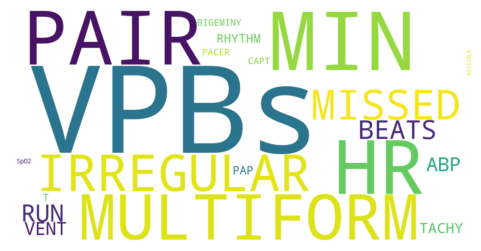

In [10]:
# Show word cloud of alarms
def generate_alarm_wordcloud(alarm_count):
    text = " ".join(alarm for alarm, count in alarm_count[["alarms", "count"]].values for j in range(count))
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        width=1000, height=500, stopwords=stopwords, background_color="white", collocations=False, max_words=20).generate(text)
    plt.figure(figsize=(6,3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
generate_alarm_wordcloud(alarm_count)

In [11]:
# find out how many alarms with "VPB" in it
def query_alarm_count(alarm_count, keyword):
    alarm_list = []
    total_count = 0
    for alarm, count in alarm_count[["alarms", "count"]].values:
        if keyword in alarm:
            alarm_list.append(alarm)
            total_count += count 
    return alarm_count[alarm_count["alarms"].isin(alarm_list)], total_count
vpb_alarm_stats = query_alarm_count(alarm_count, keyword="VPB")
print(vpb_alarm_stats[1], "VPBs:")
display(vpb_alarm_stats[0])

584358 VPBs:


,alarms,count
0,PAIR VPBs,165344
1,MULTIFORM VPBs,159343
3,VPBs > 5/MIN,95106
4,VPBs > 8/MIN,94262
6,RUN VPBs > 2,47527
9,R-ON-T VPBs,7655
10,VPBs > 5/MIN,6642
14,RUN VPBs 3 - 9,4397
22,VPBs > 11/MIN,2172
24,RUN VPBs > 5,1900


In [12]:
# How many patients have vpb
def query_records_with_alarm_keyword(fields_df_shortlisted, keyword_list):
    df_list = []
    for keyword in keyword_list:
        count = 0
        record_list = []
        for record, alarm_str in fields_df_shortlisted[["record","unique_alarms"]].values:
            if keyword in alarm_str:
                count += 1
                record_list.append(record)
        df_list.append({"keyword": keyword, "count":count, "records": record_list})
    return pd.DataFrame(df_list)
vbp_record_stats = query_records_with_alarm_keyword(fields_df_shortlisted, keyword_list=["VPB"]+vpb_alarm_stats[0]["alarms"].tolist())
vbp_record_stats

,keyword,count,records
0,VPB,49,"[048n, 054n, 055n, 211n, 212n, 213n, 214n, 216..."
1,PAIR VPBs,39,"[048n, 054n, 055n, 211n, 213n, 214n, 216n, 221..."
2,MULTIFORM VPBs,33,"[054n, 055n, 213n, 214n, 220n, 221n, 226n, 230..."
3,VPBs > 5/MIN,26,"[211n, 212n, 213n, 214n, 216n, 230n, 231n, 232..."
4,VPBs > 8/MIN,1,[264n]
5,RUN VPBs > 2,22,"[212n, 213n, 214n, 230n, 232n, 235n, 237n, 240..."
6,R-ON-T VPBs,13,"[214n, 232n, 245n, 252n, 253n, 259n, 260n, 418..."
7,VPBs > 5/MIN,7,"[055n, 226n, 408n, 409n, 442n, 457n, 472n]"
8,RUN VPBs 3 - 9,9,"[048n, 055n, 226n, 408n, 442n, 455n, 457n, 472..."
9,VPBs > 11/MIN,3,"[409n, 457n, 472n]"


In [13]:
# Shortlist patients with alarm
def shortlist_patients_with_alarm(vbp_record_stats, keyword):
    record_list = vbp_record_stats[vbp_record_stats["keyword"]==keyword]["records"][0]
    return record_list
shortlisted_records_alarm = shortlist_patients_with_alarm(vbp_record_stats, keyword="VPB")
fields_df_shortlisted_alarm = fields_df_shortlisted[fields_df_shortlisted["record"].isin(shortlisted_records_alarm)]
display(fields_df_shortlisted_alarm.head())
print(fields_df_shortlisted_alarm.shape)

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,comments,unique_alarms,record,feat_cols
0,0.976562,51138,7,1994-12-13,08:38:53,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'*ASYSTOLE': 23, '*TACHY 216 > 180': 9, '*VEN...",048n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
2,0.976562,141796,7,1995-02-24,09:44:42,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', 'bpm', ...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PULSE'...",[],"{'PAIR VPBs': 982, 'HR 53 < 55': 560, 'MULTI...",054n,"{PULSE (bpm), ABPdias (mmHg), ABPmean (mmHg), ..."
3,0.976562,131250,12,1995-03-02,15:36:24,"['mmHg', 'mmHg', 'mmHg', 'lpm', 'bpm', 'mmHg',...","['ABPmean', 'ABPsys', 'ABPdias', 'C.O.', 'HR',...",[],"{'VPBs > 5/MIN': 1661, 'PAIR VPBs': 1584, 'MUL...",055n,"{ABPdias (mmHg), PAPmean (mmHg), PULSE (bpm), ..."
7,0.976562,75991,6,1995-01-26,14:34:07,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'bpm', '%']","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'RESP',...",[],"{'PAIR VPBs': 328, 'HR 126 > 120': 99, 'ABP 2...",211n,"{ABPdias (mmHg), ABPmean (mmHg), ABPsys (mmHg)..."
8,0.976562,145275,10,1995-04-04,14:00:03,"['mmHg', 'mmHg', 'mmHg', 'bpm', 'mmHg', 'mmHg'...","['ABPmean', 'ABPsys', 'ABPdias', 'HR', 'PAPmea...",[],"{'VPBs > 5/MIN': 11644, 'MISSED BEATS': 10580...",212n,"{ABPdias (mmHg), PAPmean (mmHg), PULSE (bpm), ..."


(49, 11)


In [ ]:
# 6.22 million rows in total (with nan values)
fields_df_shortlisted_alarm["sig_len"].sum() 

## Downsample Time Series Data

In [18]:
def downsample_all_csvs(fp_converted_folder, feat_set, fields_df_shortlisted, downsample_function, window=60):
    df_list = []
    records = fields_df_shortlisted["record"].tolist()
    for record in tqdm(records):
        fp_csv = os.path.join(fp_converted_folder, record+".csv")
        df = pd.read_csv(fp_csv)
        df = downsample_function(df, window, feat_set)
        df["record"] = record
        df_list.append(df)
    all_df = pd.concat(df_list).reset_index()
    all_df.columns = ["record_index"] + all_df.columns[1:].to_list()
    return all_df

def downsample_ts(df, window, feat_set, alarm_col="alarms"):
    df[alarm_col] = df[alarm_col].str.strip()
    feat_set = list(feat_set)
    all_feat = feat_set + [alarm_col]
    df_feat_sel = df[all_feat]
    grouped = df_feat_sel.groupby((df_feat_sel.index/window).astype('i'))
    df_downsampled = grouped[feat_set].mean()
    alarm_list = []
    for group, alarms in grouped[alarm_col]:
        list_of_alarms = [eval(al) for al in alarms[alarms.notna()]]
        alarm_set = set().union(*list_of_alarms)
        alarm_list.append(alarm_set)
    df_downsampled["alarms"] = alarm_list
    return df_downsampled

def downsample_ts_withstd(df, window, feat_set, alarm_col="alarms"):
    df[alarm_col] = df[alarm_col].str.strip()
    feat_set = list(feat_set)
    all_feat = feat_set + [alarm_col]
    df_feat_sel = df[all_feat]
    grouped = df_feat_sel.groupby((df_feat_sel.index/window).astype('i'))
    
    # Downsample variables
    df_downsampled = grouped[feat_set].mean()
    df_downsampled.columns = [col + "_mean" for col in feat_set]
    std_cols = [col + "_std" for col in feat_set]
    df_downsampled[std_cols] = grouped[feat_set].std()
    
    # Aggregate alarms
    alarm_list = []
    for group, alarms in grouped[alarm_col]:
        list_of_alarms = [eval(al) for al in alarms[alarms.notna()]]
        alarm_set = set().union(*list_of_alarms)
        alarm_list.append(alarm_set)
    df_downsampled["alarms"] = alarm_list
    return df_downsampled

df_ds = downsample_all_csvs(fp_converted_folder, feat_set, fields_df_shortlisted,  downsample_ts_withstd, window=60)
df_ds

  2%|█▉                                                                                                           | 1/57 [00:00<00:05,  9.72it/s]C:\Users\WLR\AppData\Local\Temp\ipykernel_524\2307245488.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv)
  5%|█████▋                                                                                                       | 3/57 [00:00<00:12,  4.24it/s]C:\Users\WLR\AppData\Local\Temp\ipykernel_524\2307245488.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fp_csv)
 21%|██████████████████████▋                                                                                     | 12/57 [00:03<00:10,  4.26it/s]C:\Users\WLR\AppData\Local\Temp\ipykernel_524\2307245488.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f

,record_index,ABPdias (mmHg)_mean,ABPmean (mmHg)_mean,ABPsys (mmHg)_mean,SpO2 (%)_mean,HR (bpm)_mean,RESP (bpm)_mean,ABPdias (mmHg)_std,ABPmean (mmHg)_std,ABPsys (mmHg)_std,SpO2 (%)_std,HR (bpm)_std,RESP (bpm)_std,alarms,record
0,0,67.416667,84.800000,120.483333,96.300000,63.850000,0.0,32.177628,39.948187,58.295708,0.720169,37.187945,0.0,{},048n
1,1,63.300000,86.033333,127.183333,93.600000,83.416667,0.0,3.421269,4.737040,10.294793,0.668923,0.530164,0.0,{},048n
2,2,59.100000,83.350000,125.050000,93.366667,82.466667,0.0,1.003384,1.147215,2.382315,0.551321,0.812334,0.0,{},048n
3,3,63.833333,88.850000,131.766667,93.150000,83.950000,0.0,4.954596,4.277751,4.315391,0.633125,0.928367,0.0,{},048n
4,4,86.066667,109.400000,156.550000,82.400000,87.183333,0.0,2.496551,2.330345,4.118684,32.599366,1.545816,0.0,{},048n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120149,1031,NaN,NaN,NaN,96.716667,91.900000,NaN,NaN,NaN,NaN,0.454420,1.612452,NaN,{},476n
120150,1032,NaN,NaN,NaN,97.100000,81.150000,NaN,NaN,NaN,NaN,0.543061,32.374307,NaN,{IRREGULAR HR},476n
120151,1033,NaN,NaN,NaN,96.650000,96.366667,NaN,NaN,NaN,NaN,0.480995,3.883763,NaN,{IRREGULAR HR},476n
120152,1034,NaN,NaN,NaN,96.716667,94.850000,NaN,NaN,NaN,NaN,0.454420,21.963626,NaN,{IRREGULAR HR},476n


In [19]:
df_ds["alarms"].value_counts()

alarms
{}                                                              101973
{PAIR VPBs}                                                       2810
{MULTIFORM VPBs}                                                  2724
{IRREGULAR HR}                                                    1659
{VPBs >  5/MIN}                                                   1605
                                                                 ...  
{VPBs >  8/MIN, ABP   81 < 90}                                       1
{VPBs >  8/MIN, ABP   82 < 90, ABP   81 < 90, ABP   84 < 90}         1
{VPBs >  8/MIN, MISSED BEATS, ABP   76 < 90, ABP   78 < 90}          1
{MISSED BEATS, ABP   48 < 90}                                        1
{HR 126 > 120, HR 132 > 120, HR 123 > 120}                           1
Name: count, Length: 2059, dtype: int64

In [20]:
def label_rows(df_ds, keyword):
    return [(keyword in str(al)) for al in df_ds["alarms"]]
df_ds["VPBs"] = label_rows(df_ds, keyword="VPBs")
df_ds

,record_index,ABPdias (mmHg)_mean,ABPmean (mmHg)_mean,ABPsys (mmHg)_mean,SpO2 (%)_mean,HR (bpm)_mean,RESP (bpm)_mean,ABPdias (mmHg)_std,ABPmean (mmHg)_std,ABPsys (mmHg)_std,SpO2 (%)_std,HR (bpm)_std,RESP (bpm)_std,alarms,record,VPBs
0,0,67.416667,84.800000,120.483333,96.300000,63.850000,0.0,32.177628,39.948187,58.295708,0.720169,37.187945,0.0,{},048n,False
1,1,63.300000,86.033333,127.183333,93.600000,83.416667,0.0,3.421269,4.737040,10.294793,0.668923,0.530164,0.0,{},048n,False
2,2,59.100000,83.350000,125.050000,93.366667,82.466667,0.0,1.003384,1.147215,2.382315,0.551321,0.812334,0.0,{},048n,False
3,3,63.833333,88.850000,131.766667,93.150000,83.950000,0.0,4.954596,4.277751,4.315391,0.633125,0.928367,0.0,{},048n,False
4,4,86.066667,109.400000,156.550000,82.400000,87.183333,0.0,2.496551,2.330345,4.118684,32.599366,1.545816,0.0,{},048n,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120149,1031,NaN,NaN,NaN,96.716667,91.900000,NaN,NaN,NaN,NaN,0.454420,1.612452,NaN,{},476n,False
120150,1032,NaN,NaN,NaN,97.100000,81.150000,NaN,NaN,NaN,NaN,0.543061,32.374307,NaN,{IRREGULAR HR},476n,False
120151,1033,NaN,NaN,NaN,96.650000,96.366667,NaN,NaN,NaN,NaN,0.480995,3.883763,NaN,{IRREGULAR HR},476n,False
120152,1034,NaN,NaN,NaN,96.716667,94.850000,NaN,NaN,NaN,NaN,0.454420,21.963626,NaN,{IRREGULAR HR},476n,False


In [21]:
df_ds["VPBs"].value_counts()

VPBs
False    109010
True      11144
Name: count, dtype: int64

In [22]:
def label_true_negative(df_ds):
    return [len(al) == 0 for al in df_ds["alarms"]]
# label rows with no alarms at all
df_ds["no_alarms"] = label_true_negative(df_ds)
df_ds

,record_index,ABPdias (mmHg)_mean,ABPmean (mmHg)_mean,ABPsys (mmHg)_mean,SpO2 (%)_mean,HR (bpm)_mean,RESP (bpm)_mean,ABPdias (mmHg)_std,ABPmean (mmHg)_std,ABPsys (mmHg)_std,SpO2 (%)_std,HR (bpm)_std,RESP (bpm)_std,alarms,record,VPBs,no_alarms
0,0,67.416667,84.800000,120.483333,96.300000,63.850000,0.0,32.177628,39.948187,58.295708,0.720169,37.187945,0.0,{},048n,False,True
1,1,63.300000,86.033333,127.183333,93.600000,83.416667,0.0,3.421269,4.737040,10.294793,0.668923,0.530164,0.0,{},048n,False,True
2,2,59.100000,83.350000,125.050000,93.366667,82.466667,0.0,1.003384,1.147215,2.382315,0.551321,0.812334,0.0,{},048n,False,True
3,3,63.833333,88.850000,131.766667,93.150000,83.950000,0.0,4.954596,4.277751,4.315391,0.633125,0.928367,0.0,{},048n,False,True
4,4,86.066667,109.400000,156.550000,82.400000,87.183333,0.0,2.496551,2.330345,4.118684,32.599366,1.545816,0.0,{},048n,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120149,1031,NaN,NaN,NaN,96.716667,91.900000,NaN,NaN,NaN,NaN,0.454420,1.612452,NaN,{},476n,False,True
120150,1032,NaN,NaN,NaN,97.100000,81.150000,NaN,NaN,NaN,NaN,0.543061,32.374307,NaN,{IRREGULAR HR},476n,False,False
120151,1033,NaN,NaN,NaN,96.650000,96.366667,NaN,NaN,NaN,NaN,0.480995,3.883763,NaN,{IRREGULAR HR},476n,False,False
120152,1034,NaN,NaN,NaN,96.716667,94.850000,NaN,NaN,NaN,NaN,0.454420,21.963626,NaN,{IRREGULAR HR},476n,False,False


In [23]:
df_ds["no_alarms"].value_counts()

no_alarms
True     101973
False     18181
Name: count, dtype: int64

In [24]:
if not os.path.exists(fp_downsampled_folder):
    os.makedirs(fp_downsampled_folder)
df_ds.to_csv(fp_downsampled_continuous_file)

In [2]:
df_ds = pd.read_csv(fp_downsampled_continuous_file, index_col=0)
df_ds

,record_index,ABPdias (mmHg)_mean,ABPmean (mmHg)_mean,ABPsys (mmHg)_mean,SpO2 (%)_mean,HR (bpm)_mean,RESP (bpm)_mean,ABPdias (mmHg)_std,ABPmean (mmHg)_std,ABPsys (mmHg)_std,SpO2 (%)_std,HR (bpm)_std,RESP (bpm)_std,alarms,record,VPBs,no_alarms
0,0,67.416667,84.800000,120.483333,96.300000,63.850000,0.0,32.177628,39.948187,58.295708,0.720169,37.187945,0.0,set(),048n,False,True
1,1,63.300000,86.033333,127.183333,93.600000,83.416667,0.0,3.421269,4.737040,10.294793,0.668923,0.530164,0.0,set(),048n,False,True
2,2,59.100000,83.350000,125.050000,93.366667,82.466667,0.0,1.003384,1.147215,2.382315,0.551321,0.812334,0.0,set(),048n,False,True
3,3,63.833333,88.850000,131.766667,93.150000,83.950000,0.0,4.954596,4.277751,4.315391,0.633125,0.928367,0.0,set(),048n,False,True
4,4,86.066667,109.400000,156.550000,82.400000,87.183333,0.0,2.496551,2.330345,4.118684,32.599366,1.545816,0.0,set(),048n,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120149,1031,NaN,NaN,NaN,96.716667,91.900000,NaN,NaN,NaN,NaN,0.454420,1.612452,NaN,set(),476n,False,True
120150,1032,NaN,NaN,NaN,97.100000,81.150000,NaN,NaN,NaN,NaN,0.543061,32.374307,NaN,{'IRREGULAR HR'},476n,False,False
120151,1033,NaN,NaN,NaN,96.650000,96.366667,NaN,NaN,NaN,NaN,0.480995,3.883763,NaN,{'IRREGULAR HR'},476n,False,False
120152,1034,NaN,NaN,NaN,96.716667,94.850000,NaN,NaN,NaN,NaN,0.454420,21.963626,NaN,{'IRREGULAR HR'},476n,False,False


## Split Records into Train, Valid, Test Records

In [3]:
feat_set = df_ds.columns.tolist()[1:-4]
feat_set.sort()
print("Features:", feat_set)

Features: ['ABPdias (mmHg)_mean', 'ABPdias (mmHg)_std', 'ABPmean (mmHg)_mean', 'ABPmean (mmHg)_std', 'ABPsys (mmHg)_mean', 'ABPsys (mmHg)_std', 'HR (bpm)_mean', 'HR (bpm)_std', 'RESP (bpm)_mean', 'RESP (bpm)_std', 'SpO2 (%)_mean', 'SpO2 (%)_std']


In [4]:
# split records by train, valid, test
def recordwise_train_valid_test_split(df, valid_prop, test_prop, seed):
    records = df["record"].unique()
    num_records = len(records)
    record_indices = np.arange(num_records)
    np.random.seed(seed=seed)
    np.random.shuffle(record_indices)
    shuffled_records = records[record_indices]
    num_valid, num_test = round(valid_prop * num_records), round(test_prop * num_records)
    num_train = num_records - num_valid - num_test
    train_records, valid_records, test_records = (
        shuffled_records[:num_train], shuffled_records[num_train: num_train+num_valid],
        shuffled_records[num_train+num_valid:num_train+num_valid+num_test],
    )
    return train_records, valid_records, test_records

train_records, valid_records, test_records = recordwise_train_valid_test_split(df_ds, valid_prop=0.1, test_prop=0.2, seed=2023)

In [5]:
print(len(train_records), "Train Records:", train_records)
print(len(valid_records), "Valid Records:", valid_records)
print(len(test_records), "Test Records:", test_records)

40 Train Records: ['474n' '269n' '241n' '232n' '230n' '242n' '221n' '048n' '220n' '415n'
 '418n' '403n' '226n' '259n' '268n' '401n' '464n' '260n' '476n' '237n'
 '471n' '427n' '054n' '243n' '442n' '414n' '245n' '455n' '409n' '052n'
 '211n' '293n' '216n' '417n' '235n' '472n' '267n' '457n' '214n' '449n']
6 Valid Records: ['467n' '466n' '253n' '212n' '413n' '231n']
11 Test Records: ['240n' '465n' '271n' '408n' '248n' '055n' '264n' '291n' '213n' '254n'
 '252n']


## Standardise Data

In [6]:
def standardise_data(df, train_records, valid_records, test_records, predictors):
    from sklearn.preprocessing import StandardScaler
    df_train, df_valid, df_test = (
        df[df["record"].isin(train_records)], df[df["record"].isin(valid_records)],
        df[df["record"].isin(test_records)]
    )
    scaler = StandardScaler()
    scaler.fit(df_train[predictors])
    df_train[predictors] = scaler.transform(df_train[predictors])
    df_valid[predictors] = scaler.transform(df_valid[predictors])
    df_test[predictors] = scaler.transform(df_test[predictors])
    
    return pd.concat([df_train, df_valid, df_test])

df_ds = standardise_data(df_ds, train_records, valid_records, test_records, feat_set)
df_ds

/tmp/ipykernel_42853/2763367766.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[predictors] = scaler.transform(df_train[predictors])
/tmp/ipykernel_42853/2763367766.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid[predictors] = scaler.transform(df_valid[predictors])
/tmp/ipykernel_42853/2763367766.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,record_index,ABPdias (mmHg)_mean,ABPmean (mmHg)_mean,ABPsys (mmHg)_mean,SpO2 (%)_mean,HR (bpm)_mean,RESP (bpm)_mean,ABPdias (mmHg)_std,ABPmean (mmHg)_std,ABPsys (mmHg)_std,SpO2 (%)_std,HR (bpm)_std,RESP (bpm)_std,alarms,record,VPBs,no_alarms
0,0,0.261922,-0.008079,-0.203340,0.590085,-1.296498,-1.857018,3.908640,5.170986,7.809193,-0.098219,5.728606,-0.906522,set(),048n,False,True
1,1,0.033948,0.050315,0.014718,0.524562,-0.195493,-1.857018,0.157285,0.323160,1.037125,-0.106195,-0.390300,-0.906522,set(),048n,False,True
2,2,-0.198641,-0.076731,-0.054713,0.518900,-0.248949,-1.857018,-0.158135,-0.171083,-0.079184,-0.124498,-0.343200,-0.906522,set(),048n,False,True
3,3,0.063483,0.183674,0.163888,0.513642,-0.165483,-1.857018,0.357312,0.259925,0.193539,-0.111766,-0.323832,-0.906522,set(),048n,False,True
4,4,1.294729,1.156641,0.970488,0.252765,0.016455,-1.857018,0.036653,-0.008191,0.165787,4.863354,-0.220767,-0.906522,set(),048n,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105420,3706,NaN,NaN,NaN,-1.746887,-0.106400,0.114023,NaN,NaN,NaN,-0.210304,-0.478795,-0.719520,set(),465n,False,True
105421,3707,NaN,NaN,NaN,-1.746887,-0.089519,0.029522,NaN,NaN,NaN,-0.210304,-0.401657,-0.906522,set(),465n,False,True
105422,3708,NaN,NaN,NaN,-1.746887,-0.103587,0.037382,NaN,NaN,NaN,-0.210304,-0.442108,-0.803005,set(),465n,False,True
105423,3709,NaN,NaN,NaN,-1.746887,-0.110152,0.115988,NaN,NaN,NaN,-0.210304,-0.436806,-0.723006,set(),465n,False,True


In [7]:
df_ds.iloc[139-9:139+10]

,record_index,ABPdias (mmHg)_mean,ABPmean (mmHg)_mean,ABPsys (mmHg)_mean,SpO2 (%)_mean,HR (bpm)_mean,RESP (bpm)_mean,ABPdias (mmHg)_std,ABPmean (mmHg)_std,ABPsys (mmHg)_std,SpO2 (%)_std,HR (bpm)_std,RESP (bpm)_std,alarms,record,VPBs,no_alarms
130,130,NaN,NaN,NaN,0.616779,-0.529359,0.780207,NaN,NaN,NaN,-0.133414,-0.300940,0.737755,set(),048n,False,True
131,131,NaN,NaN,NaN,0.638620,-0.282711,0.626926,NaN,NaN,NaN,-0.118340,-0.309162,0.293534,set(),048n,False,True
132,132,NaN,NaN,NaN,0.655607,-0.305219,0.540460,NaN,NaN,NaN,-0.210304,-0.370284,0.420302,set(),048n,False,True
133,133,NaN,NaN,NaN,0.653181,-0.402752,0.308572,NaN,NaN,NaN,-0.163219,-0.356378,0.011999,set(),048n,False,True
134,134,NaN,NaN,NaN,0.679066,-0.403690,-0.477486,NaN,NaN,NaN,-0.182131,-0.307431,0.825048,set(),048n,False,True
135,135,NaN,NaN,NaN,0.664910,-0.396188,-0.263285,NaN,NaN,NaN,-0.133995,-0.233272,0.375915,set(),048n,False,True
136,136,NaN,NaN,NaN,0.679875,-0.453395,0.799859,NaN,NaN,NaN,-0.210304,-0.029043,3.333361,set(),048n,False,True
137,137,NaN,NaN,NaN,0.676235,-0.477778,0.713392,NaN,NaN,NaN,-0.154262,-0.380643,2.011048,set(),048n,False,True
138,138,NaN,NaN,NaN,0.679875,-0.464649,-0.326170,NaN,NaN,NaN,-0.210304,-0.051883,0.213425,set(),048n,False,True
139,139,NaN,NaN,NaN,0.679875,2.925583,-0.225947,NaN,NaN,NaN,-0.210304,12.907422,0.568828,"{'*TACHY 215 > 180', '*VENT TACHY', 'RUN VPBs ...",048n,True,False


## Flatten Data and Generate Positive and Negative Cases for Training

In [8]:
def generate_all_possible_pos_neg_data(df_ds, feat_set, input_days, prediction_day, pred_col):
    # The flattened features for past input_days
    new_feat_set = [feat + " " + str(i) for i in range(input_days) for feat in feat_set] + ["target"] + ["target_index"] + ["record"]
    data = []
    record_groups = df_ds.groupby("record")
    first_pos_index = input_days + prediction_day - 1
    for record, df in tqdm(record_groups):
        for pred_index in range(first_pos_index, len(df)):
            pred_row = df.iloc[pred_index]
            # if this is not positive and not negative case
            if (not pred_row[pred_col]) and (not pred_row["no_alarms"]):
                continue
            # else, add to data set
            start_input, end_input = pred_index - prediction_day - input_days + 1, pred_index - prediction_day
            new_row = (
                list(df[feat_set].iloc[start_input:end_input+1].values.flatten()) +
                [pred_row[pred_col], pred_row.name, pred_row["record"]]
            )
            data.append(new_row)
    return pd.DataFrame(data, columns=new_feat_set)

pos_neg = generate_all_possible_pos_neg_data(df_ds, feat_set, input_days=5, prediction_day=5, pred_col="VPBs")      
pos_neg

100%|███████████████████████████████████████████| 57/57 [00:49<00:00,  1.14it/s]


,ABPdias (mmHg)_mean 0,ABPdias (mmHg)_std 0,ABPmean (mmHg)_mean 0,ABPmean (mmHg)_std 0,ABPsys (mmHg)_mean 0,ABPsys (mmHg)_std 0,HR (bpm)_mean 0,HR (bpm)_std 0,RESP (bpm)_mean 0,RESP (bpm)_std 0,...,ABPsys (mmHg)_std 4,HR (bpm)_mean 4,HR (bpm)_std 4,RESP (bpm)_mean 4,RESP (bpm)_std 4,SpO2 (%)_mean 4,SpO2 (%)_std 4,target,target_index,record
0,0.261922,3.908640,-0.008079,5.170986,-0.203340,7.809193,-1.296498,5.728606,-1.857018,-0.906522,...,0.165787,0.016455,-0.220767,-1.857018,-0.906522,0.252765,4.863354,False,9,048n
1,0.033948,0.157285,0.050315,0.323160,0.014718,1.037125,-0.195493,-0.390300,-1.857018,-0.906522,...,0.331913,-0.017307,-0.230467,-1.857018,-0.906522,0.601005,-0.142343,False,10,048n
2,-0.198641,-0.158135,-0.076731,-0.171083,-0.054713,-0.079184,-0.248949,-0.343200,-1.857018,-0.906522,...,0.192462,-0.036064,-0.305968,-1.857018,-0.906522,0.613948,-0.139580,False,11,048n
3,0.063483,0.357312,0.183674,0.259925,0.163888,0.193539,-0.165483,-0.323832,-1.857018,-0.906522,...,0.832996,0.353133,-0.006508,-1.857018,-0.906522,0.563390,0.020365,False,12,048n
4,1.294729,0.036653,1.156641,-0.008191,0.970488,0.165787,0.016455,-0.220767,-1.857018,-0.906522,...,0.977152,0.297802,-0.323629,-1.857018,-0.906522,0.452164,1.647880,False,13,048n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112637,NaN,NaN,NaN,NaN,NaN,NaN,0.121491,-0.366191,NaN,NaN,...,NaN,0.109299,-0.318612,NaN,NaN,0.584827,-0.094644,False,120138,476n
112638,NaN,NaN,NaN,NaN,NaN,NaN,0.237781,-0.302005,NaN,NaN,...,NaN,0.306242,4.975984,NaN,NaN,0.587658,-0.141293,False,120147,476n
112639,NaN,NaN,NaN,NaN,NaN,NaN,1.191547,2.486344,NaN,NaN,...,NaN,0.328750,-0.177889,NaN,NaN,0.582804,-0.210304,False,120148,476n
112640,NaN,NaN,NaN,NaN,NaN,NaN,1.241252,0.737147,NaN,NaN,...,NaN,0.407527,0.117499,NaN,NaN,0.577142,-0.143922,False,120149,476n


In [9]:
pos_neg[pos_neg["target_index"]==139]

,ABPdias (mmHg)_mean 0,ABPdias (mmHg)_std 0,ABPmean (mmHg)_mean 0,ABPmean (mmHg)_std 0,ABPsys (mmHg)_mean 0,ABPsys (mmHg)_std 0,HR (bpm)_mean 0,HR (bpm)_std 0,RESP (bpm)_mean 0,RESP (bpm)_std 0,...,ABPsys (mmHg)_std 4,HR (bpm)_mean 4,HR (bpm)_std 4,RESP (bpm)_mean 4,RESP (bpm)_std 4,SpO2 (%)_mean 4,SpO2 (%)_std 4,target,target_index,record
130,NaN,NaN,NaN,NaN,NaN,NaN,-0.529359,-0.30094,0.780207,0.737755,...,NaN,-0.40369,-0.307431,-0.477486,0.825048,0.679066,-0.182131,True,139,048n


In [10]:
pos_neg["target"].value_counts()

target
False    101523
True      11119
Name: count, dtype: int64

## Remove Rows With NaN Values

In [11]:
pos_neg_dropna = pos_neg.dropna()
pos_neg_dropna["target"].value_counts()

target
False    79663
True      9034
Name: count, dtype: int64

In [12]:
pos_neg_dropna

,ABPdias (mmHg)_mean 0,ABPdias (mmHg)_std 0,ABPmean (mmHg)_mean 0,ABPmean (mmHg)_std 0,ABPsys (mmHg)_mean 0,ABPsys (mmHg)_std 0,HR (bpm)_mean 0,HR (bpm)_std 0,RESP (bpm)_mean 0,RESP (bpm)_std 0,...,ABPsys (mmHg)_std 4,HR (bpm)_mean 4,HR (bpm)_std 4,RESP (bpm)_mean 4,RESP (bpm)_std 4,SpO2 (%)_mean 4,SpO2 (%)_std 4,target,target_index,record
0,0.261922,3.908640,-0.008079,5.170986,-0.203340,7.809193,-1.296498,5.728606,-1.857018,-0.906522,...,0.165787,0.016455,-0.220767,-1.857018,-0.906522,0.252765,4.863354,False,9,048n
1,0.033948,0.157285,0.050315,0.323160,0.014718,1.037125,-0.195493,-0.390300,-1.857018,-0.906522,...,0.331913,-0.017307,-0.230467,-1.857018,-0.906522,0.601005,-0.142343,False,10,048n
2,-0.198641,-0.158135,-0.076731,-0.171083,-0.054713,-0.079184,-0.248949,-0.343200,-1.857018,-0.906522,...,0.192462,-0.036064,-0.305968,-1.857018,-0.906522,0.613948,-0.139580,False,11,048n
3,0.063483,0.357312,0.183674,0.259925,0.163888,0.193539,-0.165483,-0.323832,-1.857018,-0.906522,...,0.832996,0.353133,-0.006508,-1.857018,-0.906522,0.563390,0.020365,False,12,048n
4,1.294729,0.036653,1.156641,-0.008191,0.970488,0.165787,0.016455,-0.220767,-1.857018,-0.906522,...,0.977152,0.297802,-0.323629,-1.857018,-0.906522,0.452164,1.647880,False,13,048n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112560,-0.647206,-0.144920,-0.424727,-0.134323,0.162803,-0.139327,0.269667,-0.374614,0.705532,-0.382323,...,0.213224,0.227465,-0.331835,0.453993,-0.703218,0.582804,-0.210304,False,120058,476n
112561,-0.699816,-0.103878,-0.514685,0.000210,0.008209,0.206220,0.182449,-0.264842,0.709462,0.122255,...,0.034745,0.279045,-0.322618,0.550285,0.258151,0.600601,-0.140898,False,120059,476n
112562,-0.656436,-0.192457,-0.453924,-0.168527,0.151954,-0.089609,0.259351,-0.317633,0.615135,-0.295826,...,-0.192102,0.304366,-0.343782,0.858813,-0.409878,0.607072,-0.210304,False,120060,476n
112563,-0.691509,-0.179489,-0.524943,-0.178869,0.042925,-0.072229,0.201206,-0.379368,0.367527,-0.699488,...,-0.057720,0.317496,-0.311969,0.927593,-0.220040,0.609903,-0.159919,False,120061,476n


In [13]:
def label_train_valid_test_samples(df, train_records, valid_records, test_records):
    df = df.copy()
    df["train"] = df["record"].isin(train_records)
    df["valid"] = df["record"].isin(valid_records)
    df["test"] = df["record"].isin(test_records)
    return df

pos_neg_dropna = label_train_valid_test_samples(pos_neg_dropna, train_records, valid_records, test_records)
pos_neg_dropna

,ABPdias (mmHg)_mean 0,ABPdias (mmHg)_std 0,ABPmean (mmHg)_mean 0,ABPmean (mmHg)_std 0,ABPsys (mmHg)_mean 0,ABPsys (mmHg)_std 0,HR (bpm)_mean 0,HR (bpm)_std 0,RESP (bpm)_mean 0,RESP (bpm)_std 0,...,RESP (bpm)_mean 4,RESP (bpm)_std 4,SpO2 (%)_mean 4,SpO2 (%)_std 4,target,target_index,record,train,valid,test
0,0.261922,3.908640,-0.008079,5.170986,-0.203340,7.809193,-1.296498,5.728606,-1.857018,-0.906522,...,-1.857018,-0.906522,0.252765,4.863354,False,9,048n,True,False,False
1,0.033948,0.157285,0.050315,0.323160,0.014718,1.037125,-0.195493,-0.390300,-1.857018,-0.906522,...,-1.857018,-0.906522,0.601005,-0.142343,False,10,048n,True,False,False
2,-0.198641,-0.158135,-0.076731,-0.171083,-0.054713,-0.079184,-0.248949,-0.343200,-1.857018,-0.906522,...,-1.857018,-0.906522,0.613948,-0.139580,False,11,048n,True,False,False
3,0.063483,0.357312,0.183674,0.259925,0.163888,0.193539,-0.165483,-0.323832,-1.857018,-0.906522,...,-1.857018,-0.906522,0.563390,0.020365,False,12,048n,True,False,False
4,1.294729,0.036653,1.156641,-0.008191,0.970488,0.165787,0.016455,-0.220767,-1.857018,-0.906522,...,-1.857018,-0.906522,0.452164,1.647880,False,13,048n,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112560,-0.647206,-0.144920,-0.424727,-0.134323,0.162803,-0.139327,0.269667,-0.374614,0.705532,-0.382323,...,0.453993,-0.703218,0.582804,-0.210304,False,120058,476n,True,False,False
112561,-0.699816,-0.103878,-0.514685,0.000210,0.008209,0.206220,0.182449,-0.264842,0.709462,0.122255,...,0.550285,0.258151,0.600601,-0.140898,False,120059,476n,True,False,False
112562,-0.656436,-0.192457,-0.453924,-0.168527,0.151954,-0.089609,0.259351,-0.317633,0.615135,-0.295826,...,0.858813,-0.409878,0.607072,-0.210304,False,120060,476n,True,False,False
112563,-0.691509,-0.179489,-0.524943,-0.178869,0.042925,-0.072229,0.201206,-0.379368,0.367527,-0.699488,...,0.927593,-0.220040,0.609903,-0.159919,False,120061,476n,True,False,False


In [14]:
pos_neg_dropna.to_csv(fp_downsampled_dropna_file)